# Preprocess the OR3_B data

Trim the waveforms to only the first arrival, get rid of noise before and coda/sensor vibrations after

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import h5py

from scipy.signal import decimate

In [ ]:
# path to raw data file containing original waveforms
raw_data_path = ""
# key in the file that contains the actual data - for hdf5 or mat file, eg
data_key
# sampling frequency
fs = 

In [77]:
with h5py.File(raw_data_path) as f:
    print(f.keys())
    waveforms = f[data_key][()]

<KeysViewHDF5 ['AE_Channel_1', 'AE_Channel_2', 'AE_Channel_3', 'AE_Channel_4', 'AE_Channel_5', 'AE_Channel_6', 'AE_Channel_7', 'AE_Channel_8', 'Time_AE']>


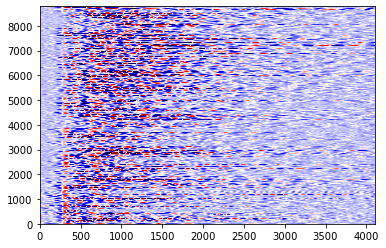

In [7]:
# plot the waveforms
# change vmin and vmax to suit data, could calculate percentiles to find autmatically
plt.pcolormesh(waveforms, cmap="seismic", vmin=-400, vmax=500)

Plot a representative spectrogram

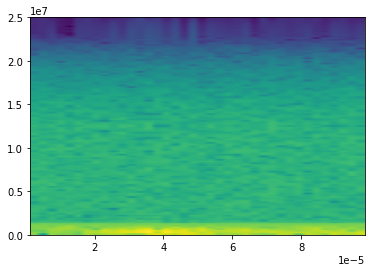

In [35]:
f, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].specgram(waveforms[0], Fs=fs)
ax[1].magnitude_spectrum(waveforms[0], scale="dB", Fs=fs)

plt.show()

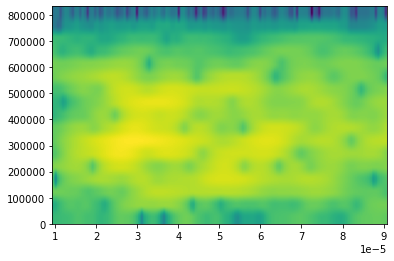

In [64]:
_=plt.specgram(decimate(decimate(waveforms[9],10),3), Fs=fs/30, NFFT=32, noverlap=31)

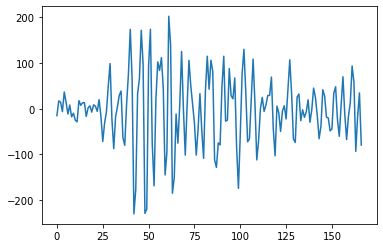

In [65]:
plt.plot(decimate(decimate(waveforms[9],10),3))

### Decimate if needed

In [79]:
x =  # first decimation factor (<=13)
y =  # second decimation factor, if needed
waveforms = decimate(decimate(waveforms,x),y)
fs = fs / (x * y)

### Create catalog

In [71]:
wf_cat =

In [87]:
wf_cat.to_csv("../specufex/wf_cat.csv", index="False")

In [80]:
path = "../specufex/data/waveforms"

for i in range(len(wf_cat)):
    filename = os.path.join(path, wf_cat.iloc[i]["filename"])
    np.save(filename, waveforms[i])

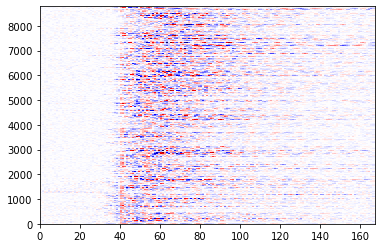

In [86]:
plt.pcolormesh(waveforms, cmap="seismic")

### Look at spectrograms

In [144]:
from h5glance import H5Glance

H5Glance("../specufex/H5files/SpecUFEx_trimmed_or3b_ch1aes.h5")

In [146]:
specufex_path = "../specufex/H5files/SpecUFEx_trimmed_or3b_ch1aes.h5"
with h5py.File(specufex_path) as f:
    tSTFT = f["spectrograms/tSTFT"][()]
    fSTFT = f["spectrograms/fSTFT"][()]
    ev_IDs = list(f["spectrograms/transformed_spectrograms"].keys())
    t_spectrograms = []
    r_spectrograms = []
    for evid in ev_IDs:
        t_spectrograms.append(f["spectrograms/transformed_spectrograms"][evid][()])
        r_spectrograms.append(f["spectrograms/raw_spectrograms"][evid][()])

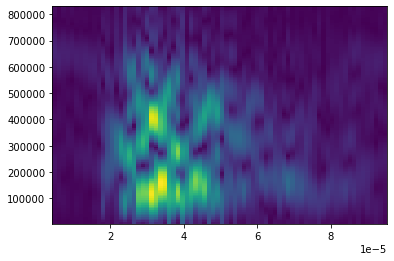

In [147]:
plt.pcolormesh(tSTFT, fSTFT, r_spectrograms[6])

In [148]:
r_spectrograms[2].shape

(127, 76)